In [ ]:
import datetime
import json
import os
import pandas as pd
import geopy.distance
import itertools
import copy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import io


In [ ]:
# Not needed if not in Google Colab
# This will prompt to import CSV's. Select df_arima_garch_data.csv in file path can be uploaded. 
#from google.colab import files
#uploaded = files.upload()

Saving df_arima_garch_data.csv to df_arima_garch_data (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded[f'df_arima_garch_data.csv']))

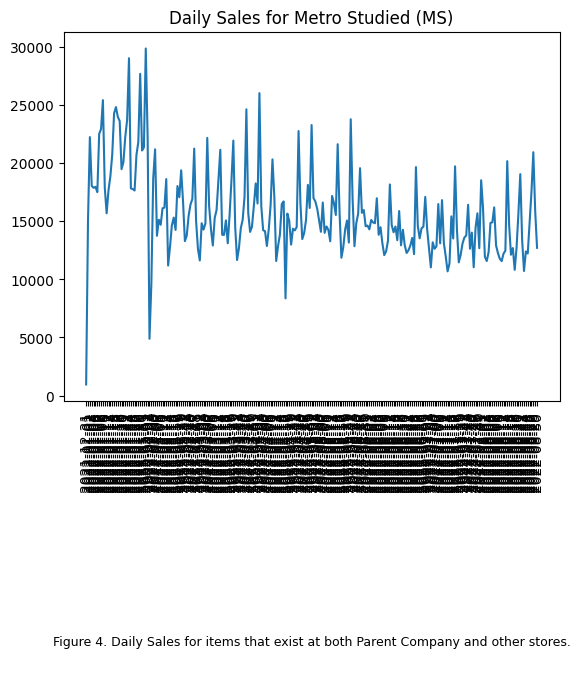

In [ ]:
plt.plot("ORDER_DAY", 
         "COMPARABLE_TOTAL_COST", 
         data=df)
plt.xticks(rotation='vertical');
plt.title('Daily Sales for Metro Studied (MS)');
plt.annotate('Figure 4. Daily Sales for items that exist at both Parent Company and other stores.\n',
             xy=(0.5,-0.7),
             xycoords='axes fraction',
             fontsize=9,
             ha='center');

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


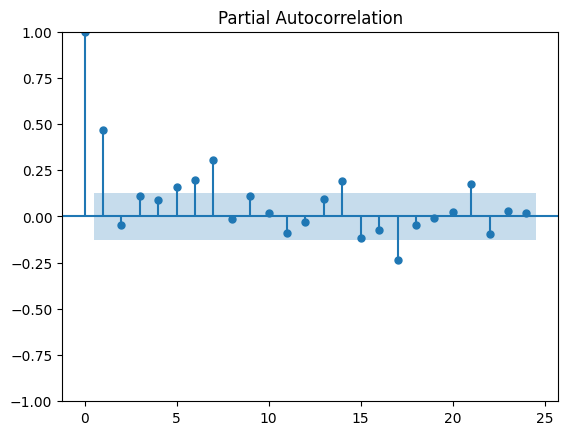

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df["COMPARABLE_TOTAL_COST"]);

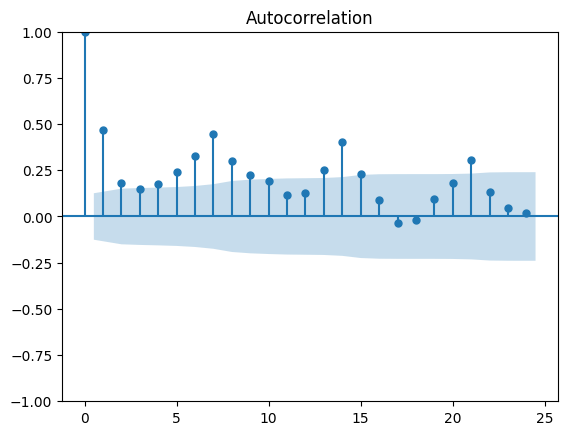

In [ ]:
plot_acf(df["COMPARABLE_TOTAL_COST"]);

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00


In [ ]:
import pmdarima
model = pmdarima.auto_arima(df["COMPARABLE_TOTAL_COST"], seasonal=True)
model

ARIMA(order=(5, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
forecast, conf_int = model.predict(n_periods=7,return_conf_int=True)

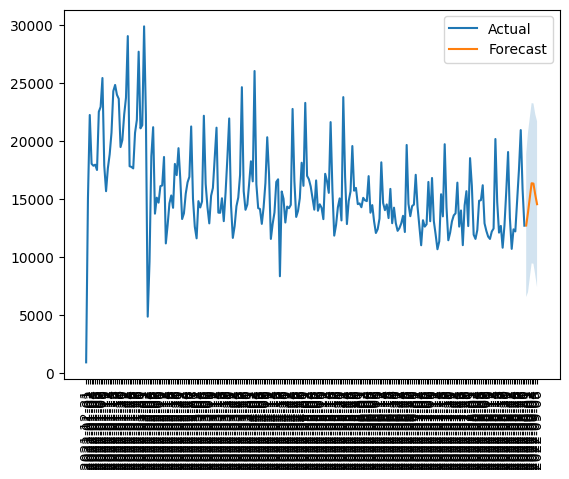

In [ ]:
import datetime
fig, ax = plt.subplots()
ax.plot(df['ORDER_DAY'], df["COMPARABLE_TOTAL_COST"], label='Actual')
dl = pd.date_range(start='2022-08-30', periods=8)[1:]
dlt = [date.strftime("%Y-%m-%d") for date in dl]
ax.plot(dlt, forecast, label='Forecast')
ax.fill_between(dlt, 
                conf_int[:,0], 
                conf_int[:,1],
                alpha=0.2)
plt.xticks(rotation='vertical');
plt.legend()
plt.show()

In [ ]:
forecast

243    12729.425551
244    13857.072816
245    15127.884178
246    16366.463551
247    16339.124673
248    15388.945844
249    14563.540059
dtype: float64

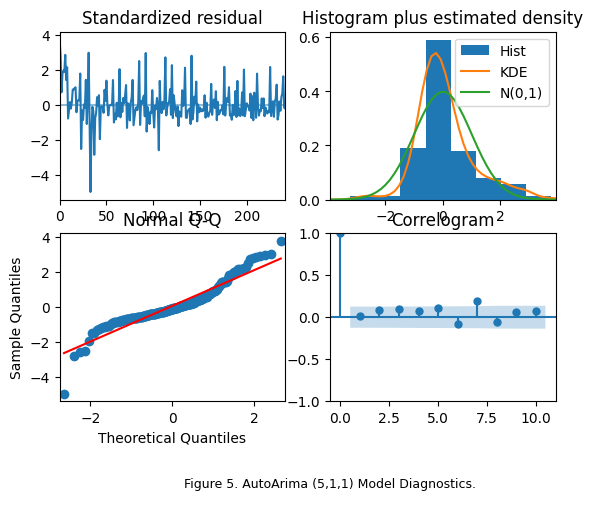

In [ ]:
model.plot_diagnostics();
plt.annotate('Figure 5. AutoArima (5,1,1) Model Diagnostics.\n',
             xy=(0,-0.6),
             xycoords='axes fraction',
             fontsize=9,
             ha='center');

In [ ]:
print("Table 4. First Test ARIMA Model Summary.")
model.summary()

Table 4. First Test ARIMA Model Summary.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -2298.430
Date:                Wed, 19 Apr 2023   AIC                           4610.859
Time:                        20:16:02   BIC                           4635.282
Sample:                             0   HQIC                          4620.697
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1089      0.121      0.902      0.367      -0.128       0.346
ar.L2         -0.3445      0.093     -3.699      0.000      -0.527      -0.162
ar.L3         -0.2314      0.091     -2.531      0.011      -0.411      -0.052
ar.L4         -0.1986      0.078     -2.562      0.010      -0.351      -0.047
ar.L5         -0.1705      0.078     -2.198      0.028      -0.323      -0.018
ma.L1         -0.6127      0.114     -5.390      0.000      -0.836      -0.390
sigma2      9.856e+06   6.53e+05     15.086      0.000    8.58e+06    1.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               123.58
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
adf_test = pmdarima.arima.ADFTest(alpha=0.05)
adf_test.should_diff(df["COMPARABLE_TOTAL_COST"])

(0.03753723361166052, False)

### Checking Parsimony

In [ ]:
model_parsimony = pmdarima.arima.ARIMA(order=(2,1,1))

In [ ]:
model_parsimony.fit(df["COMPARABLE_TOTAL_COST"])

ARIMA(order=(2, 1, 1))

In [ ]:
forecast, conf_int = model_parsimony.predict(n_periods=7,return_conf_int=True)

In [ ]:
forecast

243    13394.435535
244    14426.937333
245    14697.939958
246    14560.290747
247    14429.058828
248    14397.570499
249    14407.113454
dtype: float64

In [ ]:
conf_int

array([[ 6826.05646106, 19962.81460952],
       [ 6970.72810593, 21883.14655914],
       [ 7211.45612209, 22184.42379302],
       [ 7071.74661483, 22048.83488008],
       [ 6913.07906294, 21945.03859317],
       [ 6820.73618519, 21974.40481239],
       [ 6766.79200951, 22047.43489775]])

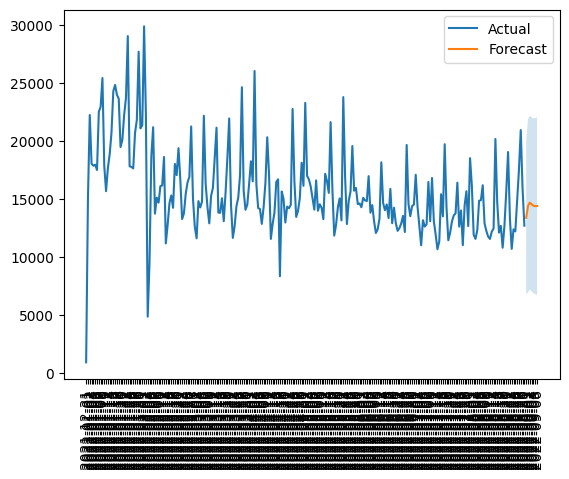

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['ORDER_DAY'], df["COMPARABLE_TOTAL_COST"], label='Actual')
dl = pd.date_range(start='2022-08-30', periods=8)[1:]
dlt = [date.strftime("%Y-%m-%d") for date in dl]
ax.plot(dlt, forecast, label='Forecast')
ax.fill_between(dlt, 
                conf_int[:,0], 
                conf_int[:,1],
                alpha=0.2)
plt.xticks(rotation='vertical');
plt.legend()
plt.show()

In [ ]:
print("Table 5. Altered Model ARIMA(2,1,1) Summary.")
model_parsimony.summary()

Table 5. Altered Model ARIMA(2,1,1) Summary.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2303.548
Date:                Wed, 19 Apr 2023   AIC                           4617.096
Time:                        20:16:40   BIC                           4634.540
Sample:                             0   HQIC                          4624.123
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.1747     30.805     -0.265      0.791     -68.551      52.202
ar.L1          0.4266      0.072      5.906      0.000       0.285       0.568
ar.L2         -0.2374      0.081     -2.920      0.004      -0.397      -0.078
ma.L1         -0.8894      0.043    -20.740      0.000      -0.973      -0.805
sigma2      1.123e+07   8.27e+05     13.576      0.000    9.61e+06    1.29e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                95.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.26e+14. Standard errors may be unstable.
"""

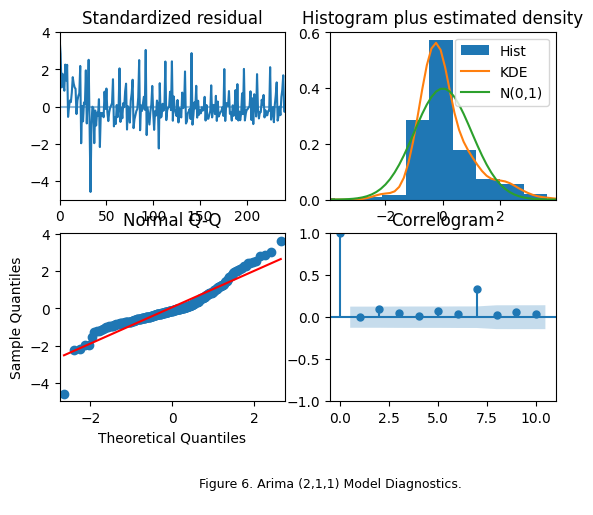

In [ ]:
model_parsimony.plot_diagnostics();
plt.annotate('Figure 6. Arima (2,1,1) Model Diagnostics.\n',
             xy=(0,-0.6),
             xycoords='axes fraction',
             fontsize=9,
             ha='center');

In [ ]:
!pip install arch
import arch
import pmdarima

p, d, q = model_parsimony.order
arima_residuals = model_parsimony.arima_res_.resid
square_resids = [i**2 for i in arima_residuals]

resids_model = pmdarima.auto_arima(square_resids, seasonal=True)
resids_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 15.3 MB/s eta 0:00:00


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
print("Table 6. Parsimony Fix Model Residuals ARIMA(0,1,1)")
resids_model.summary()

Table 6. Parsimony Fix Model Residuals ARIMA(0,1,1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4472.793
Date:                Wed, 19 Apr 2023   AIC                           8949.586
Time:                        20:17:07   BIC                           8956.564
Sample:                             0   HQIC                          8952.397
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9561      0.019    -49.288      0.000      -0.994      -0.918
sigma2      6.295e+14   2.11e-17   2.98e+31      0.000     6.3e+14     6.3e+14
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):              9355.60
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             4.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### Modeling with manual differencing

In [ ]:
l = [df["COMPARABLE_TOTAL_COST"][i] - df["COMPARABLE_TOTAL_COST"][i-1] for i in range(1,len(df["COMPARABLE_TOTAL_COST"]))]
model2 = pmdarima.auto_arima(l, seasonal=True)
model2

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

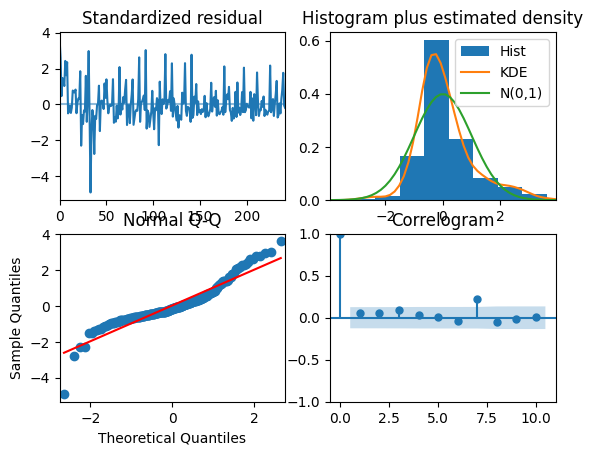

In [ ]:
model2.plot_diagnostics();

### Training new model on less data and predict

In [ ]:
from datetime import datetime

df_train = df[df["ORDER_DAY"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())<datetime.strptime('2022-08-24', '%Y-%m-%d').date()]
df_test = df[df["ORDER_DAY"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())>=datetime.strptime('2022-08-24', '%Y-%m-%d').date()]

In [ ]:
model_train = model_parsimony.fit(df_train["COMPARABLE_TOTAL_COST"])
model_train

ARIMA(order=(2, 1, 1))

In [ ]:
forecast_test, conf_int_test = model_train.predict(n_periods=7,return_conf_int=True)

In [ ]:
import sklearn.metrics as skmetrics
skmetrics.mean_squared_error(df_test["COMPARABLE_TOTAL_COST"],forecast_test)

13854265.622112436

In [ ]:
pd.DataFrame({'Actuals':df_test["COMPARABLE_TOTAL_COST"],
              'Predictions':forecast_test})

,Actuals,Predictions
236,12400.21,11804.779404
237,12222.28,12792.900846
238,14849.90,13075.927885
239,17513.29,13027.228989
240,20942.31,12938.175343
241,15877.34,12887.356341
242,12714.81,12862.523453


In [ ]:
np.sqrt(np.mean((df_test["COMPARABLE_TOTAL_COST"] - forecast_test)**2))

3722.1318652235354

In [ ]:
skmetrics.mean_absolute_percentage_error(df_test["COMPARABLE_TOTAL_COST"],forecast_test)

0.15035015292921455

In [ ]:
skmetrics.mean_absolute_error(df_test["COMPARABLE_TOTAL_COST"],forecast_test)

2652.5594766619947

In [ ]:
model_train_2 = pmdarima.arima.ARIMA(order=(5,1,5),seasonal=True)

In [ ]:
model_train_2.fit(df_train["COMPARABLE_TOTAL_COST"]);
forecast_test_2 = model_train_2.predict(n_periods=7);

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pd.DataFrame({'Actuals':df_test["COMPARABLE_TOTAL_COST"],
              'Predictions':forecast_test_2})

,Actuals,Predictions
236,12400.21,11712.783227
237,12222.28,14110.916974
238,14849.90,13794.742935
239,17513.29,13340.774160
240,20942.31,14148.164661
241,15877.34,14140.719894
242,12714.81,12303.215749


In [ ]:
np.sqrt(skmetrics.mean_squared_error(df_test["COMPARABLE_TOTAL_COST"],forecast_test_2))

3205.0946091242013

In [ ]:
import arch
import pmdarima

p, d, q = model_parsimony.order
arima_residuals = model_parsimony.arima_res_.resid
square_resids = [i**2 for i in arima_residuals]


In [ ]:
resids_model = pmdarima.auto_arima(square_resids, seasonal=True)
resids_model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model_parsimony.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  236
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2237.125
Date:                Wed, 19 Apr 2023   AIC                           4484.251
Time:                        20:20:42   BIC                           4501.549
Sample:                             0   HQIC                          4491.225
                                - 236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -15.3241      4.670     -3.282      0.001     -24.477      -6.172
ar.L1          0.4945      0.066      7.538      0.000       0.366       0.623
ar.L2         -0.1754      0.067     -2.600      0.009      -0.308      -0.043
ma.L1         -0.9989      0.077    -13.021      0.000      -1.149      -0.849
sigma2      1.127e+07   2.07e-06   5.44e+12      0.000    1.13e+07    1.13e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                71.77
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.13e+28. Standard errors may be unstable.
"""

In [ ]:
resids_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  236
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4335.589
Date:                Wed, 19 Apr 2023   AIC                           8675.178
Time:                        20:20:42   BIC                           8682.098
Sample:                             0   HQIC                          8677.968
                                - 236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9525      0.021    -44.633      0.000      -0.994      -0.911
sigma2      5.797e+14   2.28e-17   2.54e+31      0.000     5.8e+14     5.8e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):              5251.42
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             3.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
forecast_mu = model_parsimony.predict(n_periods=7)
forecast_sigma = resids_model.predict(n_periods=7)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
pd.DataFrame({"Actuals":df_test["COMPARABLE_TOTAL_COST"],
              "forecast_mu":forecast_mu,
              "forecast_sigma":np.sqrt(forecast_sigma),
              "- 95% CI": forecast_mu - 1.96*np.sqrt(forecast_sigma),
              "+ 95% CI": forecast_mu + 1.96*np.sqrt(forecast_sigma)})

,Actuals,forecast_mu,forecast_sigma,- 95% CI,+ 95% CI
236,12400.210,11804.779,2425.878,7050.058,16559.501
237,12222.280,12792.901,2425.878,8038.180,17547.622
238,14849.900,13075.928,2425.878,8321.207,17830.649
239,17513.290,13027.229,2425.878,8272.508,17781.950
240,20942.310,12938.175,2425.878,8183.454,17692.897
241,15877.340,12887.356,2425.878,8132.635,17642.078
242,12714.810,12862.523,2425.878,8107.802,17617.245


In [ ]:
np.sqrt(forecast_sigma)/forecast_mu

236   0.205
237   0.190
238   0.186
239   0.186
240   0.187
241   0.188
242   0.189
dtype: float64

In [ ]:
np.sqrt(skmetrics.mean_squared_error(df_test["COMPARABLE_TOTAL_COST"],
                                     forecast_mu))

3722.1318652235354

In [ ]:
skmetrics.mean_absolute_error(df_test["COMPARABLE_TOTAL_COST"],
                              forecast_mu)

2652.5594766619947

In [ ]:
skmetrics.mean_absolute_percentage_error(df_test["COMPARABLE_TOTAL_COST"],
                                         forecast_mu)

0.15035015292921455

### Applying Log Diff to test normality of Residuals. The results are not convincing

In [ ]:
import math
log_diff_data = df["COMPARABLE_TOTAL_COST"].apply(lambda x: math.log(x)).diff()
log_diff_data.dropna(inplace=True)

In [ ]:
np.mean(log_diff_data)

0.01070566706231481

In [ ]:
np.std(log_diff_data)

0.29270559913740474

In [ ]:
log_diff_data = [i for i in log_diff_data if abs(i - np.mean(log_diff_data)) < 1.96*np.mean(log_diff_data)]

In [ ]:
np.mean(log_diff_data)

0.011279791766255034

In [ ]:
np.std(log_diff_data)

0.012956292163050973

In [ ]:
model_parsimony_log_diff = pmdarima.auto_arima(log_diff_data)
model_parsimony_log_diff

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model_parsimony_log_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                        SARIMAX   Log Likelihood                  79.035
Date:                Wed, 19 Apr 2023   AIC                           -154.071
Time:                        20:20:43   BIC                           -151.479
Sample:                             0   HQIC                          -153.300
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0113      0.002      4.515      0.000       0.006       0.016
sigma2         0.0002   7.05e-05      2.380      0.017    2.96e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.28   Prob(JB):                         0.47
Heteroskedasticity (H):               0.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.62   Kurtosis:                         1.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

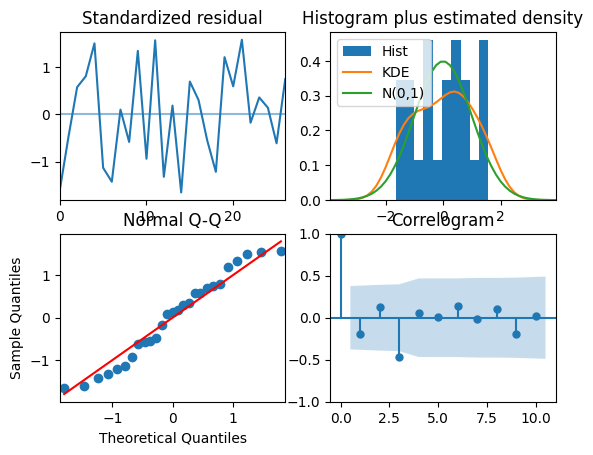

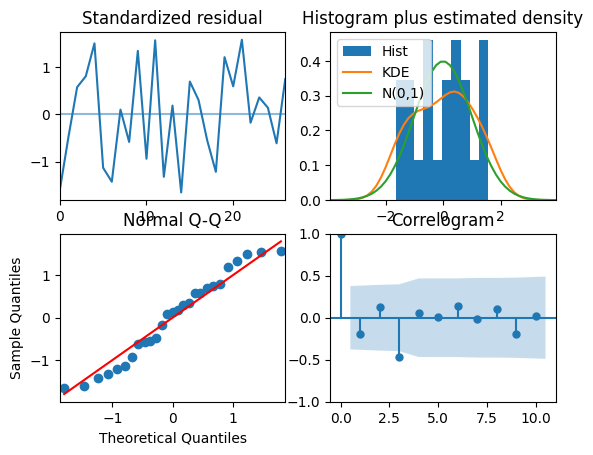

In [ ]:
model_parsimony_log_diff.plot_diagnostics()

In [ ]:
arima_residuals = model_parsimony_log_diff.arima_res_.resid
square_resids = [i**2 for i in arima_residuals]
resids_model = pmdarima.auto_arima(square_resids)
resids_model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
resids_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                        SARIMAX   Log Likelihood                 198.694
Date:                Wed, 19 Apr 2023   AIC                           -393.388
Time:                        20:20:45   BIC                           -390.796
Sample:                             0   HQIC                          -392.617
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   3.86e-05      4.350      0.000    9.22e-05       0.000
sigma2      2.374e-08   1.34e-08      1.778      0.075   -2.44e-09    4.99e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 3.10
Prob(Q):                              0.51   Prob(JB):                         0.21
Heteroskedasticity (H):               0.82   Skew:                             0.57
Prob(H) (two-sided):                  0.77   Kurtosis:                         1.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

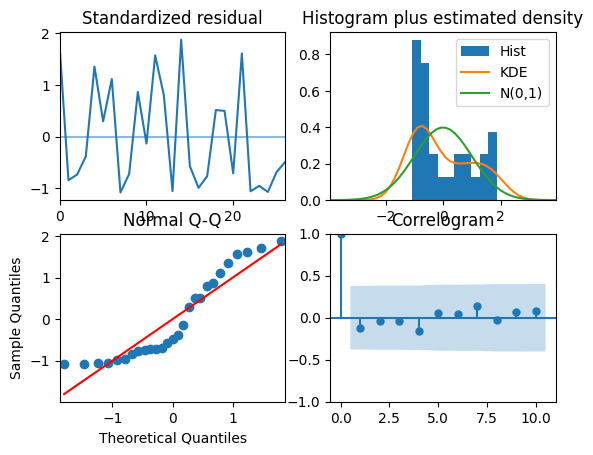

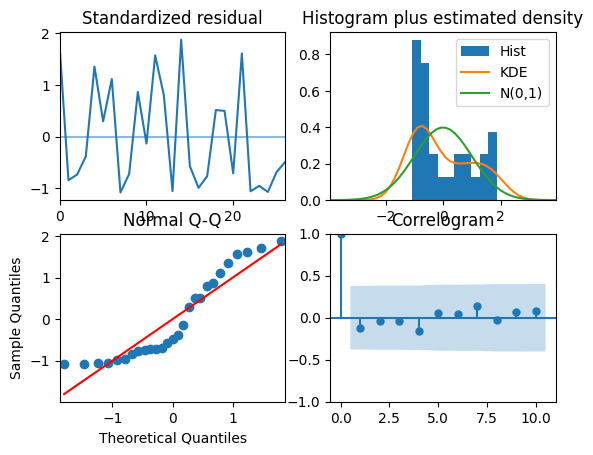

In [ ]:
resids_model.plot_diagnostics()